# Basic Segmentation

In [ ]:
cd Dataset/

In [ ]:
from skimage import io
from skimage.viewer import ImageViewer
from skimage import filters
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
folder="database_image/"
for i in range(1,323):
    f_name='mdb'
    if i<10: f_name+="00"
    elif i<100: f_name+="0"
    f_name+=str(i)+'.pgm'
    print(f_name)
    I = io.imread(folder+f_name)
    I2 = io.imread(folder+f_name)
    val = filters.threshold_otsu(I2)
    mask = I < val;
    I2[mask==True]=0;
    I3=np.concatenate((I,I2),axis=1)
    io.imsave("Segmented_Images/"+f_name,I3)

In [ ]:
I3=np.concatenate((I,I2),axis=1)

In [ ]:
imshow(I3)
plt.show()

# LBP

In [ ]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt


METHOD = 'uniform'
plt.rcParams['font.size'] = 9


def plot_circle(ax, center, radius, color):
    circle = plt.Circle(center, radius, facecolor=color, edgecolor='0.5')
    ax.add_patch(circle)


def plot_lbp_model(ax, binary_values):
    """Draw the schematic for a local binary pattern."""
    # Geometry spec
    theta = np.deg2rad(45)
    R = 1
    r = 0.15
    w = 1.5
    gray = '0.5'

    # Draw the central pixel.
    plot_circle(ax, (0, 0), radius=r, color=gray)
    # Draw the surrounding pixels.
    for i, facecolor in enumerate(binary_values):
        x = R * np.cos(i * theta)
        y = R * np.sin(i * theta)
        plot_circle(ax, (x, y), radius=r, color=str(facecolor))

    # Draw the pixel grid.
    for x in np.linspace(-w, w, 4):
        ax.axvline(x, color=gray)
        ax.axhline(x, color=gray)

    # Tweak the layout.
    ax.axis('image')
    ax.axis('off')
    size = w + 0.2
    ax.set_xlim(-size, size)
    ax.set_ylim(-size, size)


fig, axes = plt.subplots(ncols=5, figsize=(7, 2))

titles = ['flat', 'flat', 'edge', 'corner', 'non-uniform']

binary_patterns = [np.zeros(8),
                   np.ones(8),
                   np.hstack([np.ones(4), np.zeros(4)]),
                   np.hstack([np.zeros(3), np.ones(5)]),
                   [1, 0, 0, 1, 1, 1, 0, 0]]

for ax, values, name in zip(axes, binary_patterns, titles):
    plot_lbp_model(ax, values)
    ax.set_title(name)
plt.show()

# K-Means Segmentation

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib
np.set_printoptions(threshold=np.inf)

In [ ]:
def kmeans(image,segments):
       #Preprocessing step
       image=cv2.GaussianBlur(image,(7,7),0)
       vectorized=image.reshape(-1,3)
       vectorized=np.float32(vectorized)
       criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10, 1.0)
       ret,label,center=cv2.kmeans(vectorized,segments,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
       res = center[label.flatten()]
       segmented_image = res.reshape((image.shape))
       return label.reshape((image.shape[0],image.shape[1])),segmented_image.astype(np.uint8)

In [ ]:
def extractComponent(image,label_image,label):
       component=np.zeros(image.shape,np.uint8)
       component[label_image==label]=image[label_image==label]
       return component

In [ ]:
image=io.imread('Dataset/Segmented_Images3/mdb201.pgm')

In [ ]:
segments=4
label,result=kmeans(image,segments)

In [ ]:
k_images=[]
k_median=[]
for i in range(segments):
    imagex=extractComponent(image,label,i)
    imagexx=imagex[imagex!=0]
    k_median.append(np.median(imagexx))
    k_images.append(extractComponent(image,label,i))
index = k_median.index(max(k_median))

In [ ]:
io.imshow(k_images[index])
plt.show()

In [ ]:
x=np.concatenate((k_images[0],k_images[1],k_images[2]),axis=1)

In [ ]:
io.imshow(x)
plt.show()

In [ ]:

fig, axes = plt.subplots(ncols=segments)
for i in range(segments):
    imagex=extractComponent(image,label,i)
    imagexx=imagex[imagex!=0]
    print("Median: "+ str(np.median(imagexx))+" Mean: "+str(np.mean(imagexx)))
    axes[i].imshow(imagex)
    axes[i].set_title("Cluster No. "+str(i))
    axes[i].axis('off')
plt.show()

In [ ]:
# imagex=extractComponent(image,label,1)
imagex=k_images[4]
io.imshow(imagex)

In [ ]:
a=np.array([[10, 0, 4], [3, 2, 0]])

In [ ]:
a[a!=0]

In [ ]:
io.imsave("segmented.jpg",extractComponent(image,label,1))

In [ ]:
io.imsave("original.jpg",image)

In [ ]:
# segments=4
folder="Dataset/Images_without_pectoral/"
for i in range(214,323):
    f_name='mdb'
    if i<10: f_name+="00"
    elif i<100: f_name+="0"
    f_name+=str(i)+'.pgm'
    I = io.imread(folder+f_name)
    label3,result3=kmeans(I,3)
    label4,result4=kmeans(I,4)
    k_images3=[]
    k_median3=[]
    for i in range(3):
        imagex=extractComponent(I,label3,i)
        imagexx=imagex[imagex!=0]
        k_median3.append(np.median(imagexx))
        k_images3.append(imagex)
    index3 = k_median3.index(max(k_median3))
    k_images4=[]
    k_median4=[]
    for i in range(4):
        imagex=extractComponent(I,label4,i)
        imagexx=imagex[imagex!=0]
        k_median4.append(np.median(imagexx))
        k_images4.append(imagex)
    index4 = k_median4.index(max(k_median4))
    io.imsave("Dataset/Kmeans_Segment3/"+f_name,k_images3[index3])
    io.imsave("Dataset/Kmeans_Segment4/"+f_name,k_images4[index4])
    I3=np.concatenate((I,k_images3[index3],k_images4[index4]),axis=1)
    io.imsave("Dataset/Kmeans_Combined3_4/"+f_name,I3)
    print(f_name)

# Region Growing

In [44]:
from skimage import io
import cv2
import cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(threshold=np.inf)

In [ ]:
image=cv2.imread('Regiongrowing_figure_Original.jpg',0)

In [ ]:
image=cv2.imread('mdb004.pgm',0)

In [ ]:
image[43][2]

In [ ]:
plt.imshow(image)
plt.show()

In [ ]:
imagex=image
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if(image[i][j]==255):
            imagex[i][j]=255
        else:
            imagex[i][j]=0
        

In [ ]:
plt.imshow(image,cmap='gray')
plt.show()

In [ ]:
#imagex

In [2]:
dims = image.shape
dims

NameError: name 'image' is not defined

In [ ]:
def inimg(x,y,dims):
    if(x>=0 and x<dims[0] and y>=0 and y<dims[1]):
        return True
    return False

In [ ]:
inimg(2345,10,dims)

In [ ]:
# image=cv2.imread('Regiongrowing_figure_Original.jpg',0)
image=np.array([[1,2,3],[4,5,6],[700,8,9]])
dims = image.shape

In [ ]:
image=cv2.imread('mdb214.pgm',0)
dims = image.shape

In [ ]:
imagex=np.zeros_like(image)
visited=np.zeros_like(image)

In [23]:
threshold=20
maxv=0
for i in range(dims[0]):
    for j in range(dims[1]):
        maxv=max(maxv,image[i][j])

In [ ]:
l=[]
for i in range(dims[0]):
    for j in range(dims[1]):
        if(int(image[i][j])>200):
            l.insert(0,(i,j))
            visited[i][j]=1
            break;

In [ ]:
h.sort()

In [70]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax1.set_adjustable('box-forced')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    ax2.set_adjustable('box-forced')

In [ ]:
## new latest code

In [249]:
def testing(f_name,annot,image,name):
    dims = image.shape
    h = []
    for i in range(dims[0]):
        for j in range(dims[1]):
            h.append((image[i][j],[i,j]))
    h.sort()
    imagex=np.zeros_like(image)
    visited=np.zeros_like(image)
    seeds=[]
    for item in h[-1::-1]:
        if(len(seeds)>20):
            break
        x1 = item[1][0]
        y1 = item[1][1]
        if(far(x1,y1)):
            seeds.append((x1,y1))
    l=seeds
    orient = [(1, 0), (0, 1), (-1, 0), (0, -1)]
    for i in l:
        l2=[i]
        mn = 0
        cnt = 0
        sm = 0
        visited=np.zeros_like(image)
        while(l2!=[]):
            x,y=l2.pop()
            imagex[x][y]=image[x][y]
            #print(x,y)
            cnt+=1
            sm+=int(image[x][y])
            mn = sm/cnt
            for i,j in orient:
                if(inimg(x+i,y+j,dims) and visited[x+i][y+j]==0):
        #         if(not (x+i,y+j) in s and not (x+i,y+j) in l):
        #         if(x>=0 and x<dims[0] and y>=0 and y<dims[1] and  not (x+i,y+j) in s and not (x+i,y+j) in l):
                    #print abs(int(mn)-int(image[x+i][y+j])),mn,int(image[x+i][y+j])
                    if(abs(int(mn)-int(image[x+i][y+j]))<=threshold):
                        l2.insert(0,(x+i,y+j))
                        visited[x+i][y+j]=1
#     plot_comparison(annot, imagex, 'segmented:'+name)
    I3=np.concatenate((annot,imagex),axis=1)
    io.imsave("/media/ayush/New Volume/ML/Projects/Mammo-Extended/segmented_anotated/"+f_name,I3)
    print(f_name)
    

In [260]:
import os
data_path = "/media/ayush/New Volume/ML/Projects/Mammo-Extended/database_image/"
rootDir = data_path
print rootDir
for dirName, subdirList, fileList in os.walk(rootDir):
    print('Found directory: %s' % dirName)
    for fname in fileList:
        if(fname[-3:]=='pgm'):
#             print fname
            num = int(fname[3:6])
            if(num>245):
                image=cv2.imread('Segmented_Images2/'+fname,0)
                image2 = cv2.imread('annotated/'+fname,0)
                testing(fname,image2,image,fname)

            

/media/arpit/New Volume/ML/Projects/Mammo-Extended/database_image/
Found directory: /media/arpit/New Volume/ML/Projects/Mammo-Extended/database_image/
mdb246.pgm
mdb247.pgm
mdb248.pgm
mdb249.pgm
mdb250.pgm
mdb251.pgm
mdb252.pgm
mdb253.pgm
mdb254.pgm
mdb255.pgm
mdb256.pgm
mdb257.pgm
mdb258.pgm
mdb259.pgm
mdb260.pgm
mdb261.pgm
mdb262.pgm
mdb263.pgm
mdb264.pgm
mdb283.pgm
mdb304.pgm
mdb284.pgm
mdb285.pgm
mdb286.pgm
mdb287.pgm
mdb288.pgm
mdb289.pgm
mdb290.pgm
mdb291.pgm
mdb292.pgm
mdb293.pgm
mdb294.pgm
mdb295.pgm
mdb296.pgm
mdb297.pgm
mdb298.pgm
mdb299.pgm
mdb300.pgm
mdb301.pgm
mdb302.pgm
mdb303.pgm
mdb305.pgm
mdb306.pgm
mdb307.pgm
mdb308.pgm
mdb309.pgm
mdb310.pgm
mdb311.pgm
mdb312.pgm
mdb313.pgm
mdb314.pgm
mdb315.pgm
mdb316.pgm
mdb317.pgm
mdb318.pgm
mdb319.pgm
mdb320.pgm
mdb321.pgm
mdb322.pgm
mdb265.pgm
mdb266.pgm
mdb267.pgm
mdb268.pgm
mdb269.pgm
mdb270.pgm
mdb271.pgm
mdb272.pgm
mdb273.pgm
mdb274.pgm
mdb275.pgm
mdb276.pgm
mdb277.pgm
mdb278.pgm
mdb279.pgm
mdb280.pgm
mdb281.pgm
mdb282.pgm


In [ ]:
# for i in range(1,333):
#     #print 'mdb0'+str(i)+'.pgm'
#     f_name = 'mdb0'+str(i)+'.pgm'
#     image=cv2.imread('Segmented_Images2/'+'mdb0'+str(i)+'.pgm',0)
#     image2 = cv2.imread('annotated/'+'mdb0'+str(i)+'.pgm',0)
#     testing(f_name,image2,image,'mdb0'+str(i)+'.pgm')

        

In [190]:
def far(x1,y1):
    for pts in seeds:
        if (abs(pts[0]-x1)+abs(pts[1]-y1))<30:
            return False
    return True
def inimg(x,y,dims):
    if(x>=0 and x<dims[0] and y>=0 and y<dims[1]):
        return True
    return False

In [257]:
image=cv2.imread('Segmented_Images2/'+'mdb244.pgm',0)
dims = image.shape

In [226]:
h = []
for i in range(dims[0]):
    for j in range(dims[1]):
        h.append((image[i][j],[i,j]))
h.sort()

In [227]:
imagex=np.zeros_like(image)
visited=np.zeros_like(image)
threshold=25

In [228]:
seeds=[]

In [229]:
for item in h[-1::-1]:
    if(len(seeds)>20):
        break
    x1 = item[1][0]
    y1 = item[1][1]
    if(far(x1,y1)):
        seeds.append((x1,y1))    

In [230]:
l = seeds

In [231]:
l

[(482, 644),
 (276, 708),
 (206, 666),
 (247, 710),
 (199, 702),
 (478, 550),
 (247, 649),
 (229, 678),
 (519, 529),
 (175, 694),
 (214, 644),
 (190, 652),
 (543, 493),
 (264, 690),
 (164, 658),
 (570, 532),
 (294, 691),
 (262, 634),
 (150, 682),
 (486, 496),
 (162, 711)]

In [232]:
orient = [(1, 0), (0, 1), (-1, 0), (0, -1)]
for i in l:
    l2=[i]
    mn = 0
    cnt = 0
    sm = 0
    visited=np.zeros_like(image)
    while(l2!=[]):
        x,y=l2.pop()
        imagex[x][y]=image[x][y]
        #print(x,y)
        cnt+=1
        sm+=int(image[x][y])
        mn = sm/cnt
        for i,j in orient:
            if(inimg(x+i,y+j,dims) and visited[x+i][y+j]==0):
    #         if(not (x+i,y+j) in s and not (x+i,y+j) in l):
    #         if(x>=0 and x<dims[0] and y>=0 and y<dims[1] and  not (x+i,y+j) in s and not (x+i,y+j) in l):
                #print abs(int(mn)-int(image[x+i][y+j])),mn,int(image[x+i][y+j])
                if(abs(int(mn)-int(image[x+i][y+j]))<=threshold):
                    l2.insert(0,(x+i,y+j))
                    visited[x+i][y+j]=1

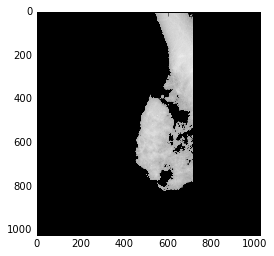

In [233]:
plt.imshow(imagex,cmap='gray')
plt.show()

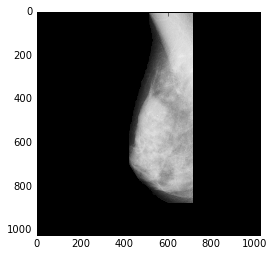

In [234]:
plt.imshow(image,cmap='gray')
plt.show()

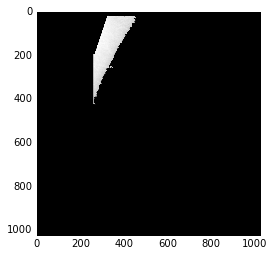

In [128]:
plt.imshow(imagex,cmap='gray')
plt.show()

In [ ]:
plt.imshow(image,cmap='gray')

In [40]:
for x,y in l:
    imagex[x][y] = image[x][y]